In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import cross_val_score
import scipy.stats as stats


In [45]:
df = pd.read_csv('..\\..\\Datasets\\titanic_train.csv', usecols=['Age','Fare','Survived'])
df['Age'].fillna(df['Age'].mean(), inplace = True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)
df.isnull().sum()
# df.dtypes

C:\Users\Acer1\AppData\Local\Temp\ipykernel_32652\2849439635.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace = True)
C:\Users\Acer1\AppData\Local\Temp\ipykernel_32652\2849439635.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

Survived    0
Age         0
Fare        0
dtype: int64

In [46]:
def apply_transform(transform):
  X = df[['Age','Fare']]
  y = df['Survived']

  trf = ColumnTransformer(transformers=[
                          ('log', FunctionTransformer(transform), ['Fare'])
                          ],
                          remainder='passthrough')
  
  X_trans = trf.fit_transform(X)

  clf = LogisticRegression()

  print('Accurcay:',np.mean(cross_val_score(clf, X_trans, y , scoring='accuracy', cv=10)))

  plt.figure(figsize=(14,4))
  plt.subplot(1,2,1)
  stats.probplot(X['Fare'], dist='norm', plot=plt)
  plt.title('Fare before transform')

  plt.subplot(1,2,2)
  stats.probplot(X_trans[:,0], dist='norm', plot=plt)
  plt.title('Fare after transform')
  plt.show()

Accurcay: 0.6589013732833957


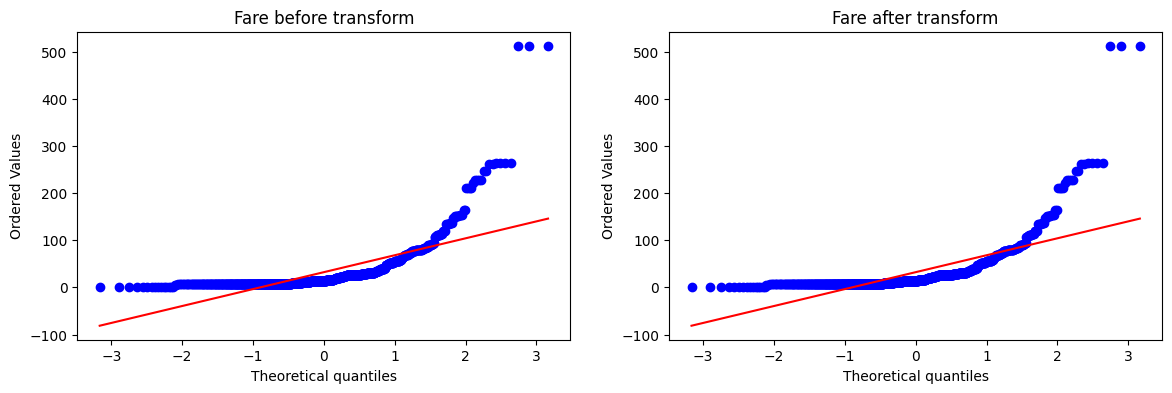

In [47]:
apply_transform(lambda X: X)

# Square Transform

Accurcay: 0.6431335830212235


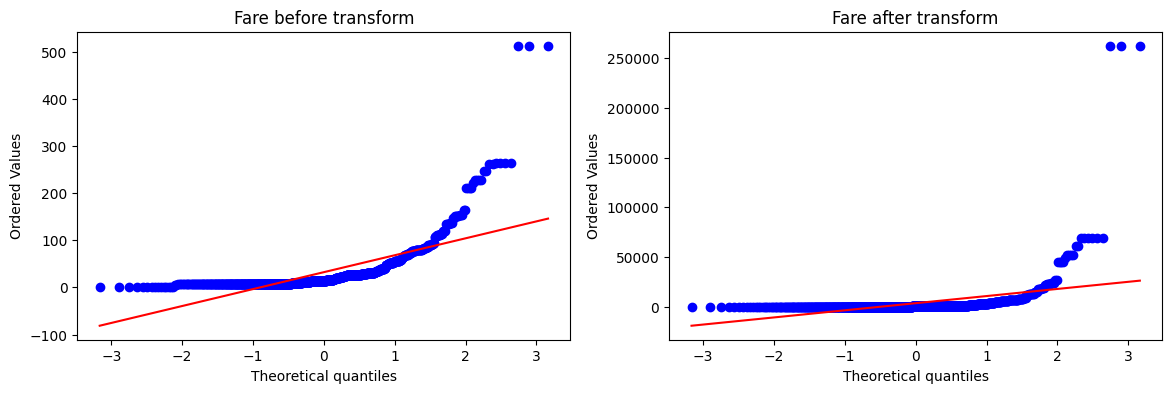

In [48]:
apply_transform(lambda X : X**2)

# SquareRoot Transoform

Accurcay: 0.6611485642946316


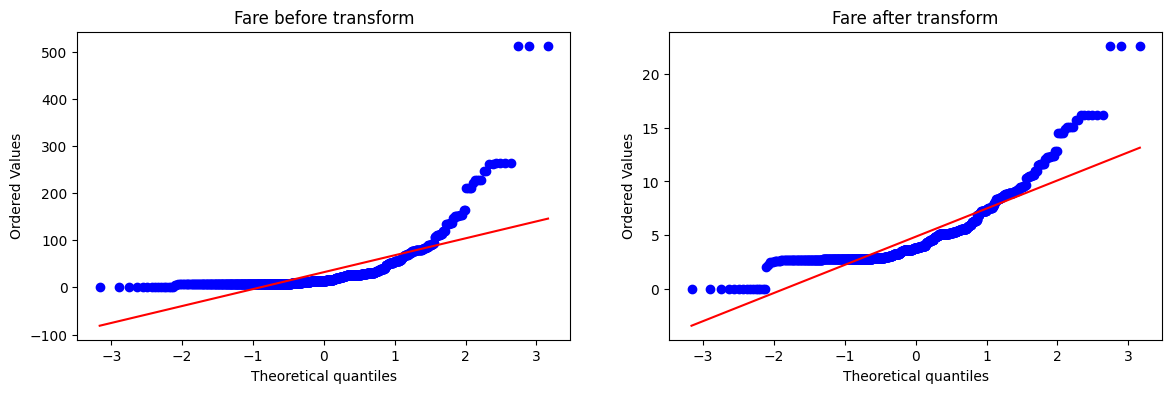

In [51]:
apply_transform(lambda X : X ** (1/2))

# Reciprocal Transoform

Accurcay: 0.61729088639201


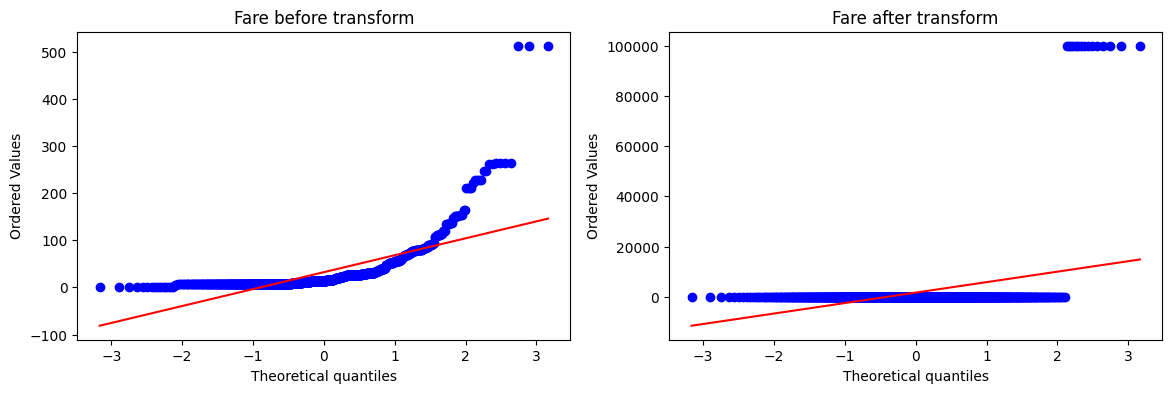

In [50]:
apply_transform(lambda X : 1/(X+0.00001))

# Others

Accurcay: 0.6195131086142323


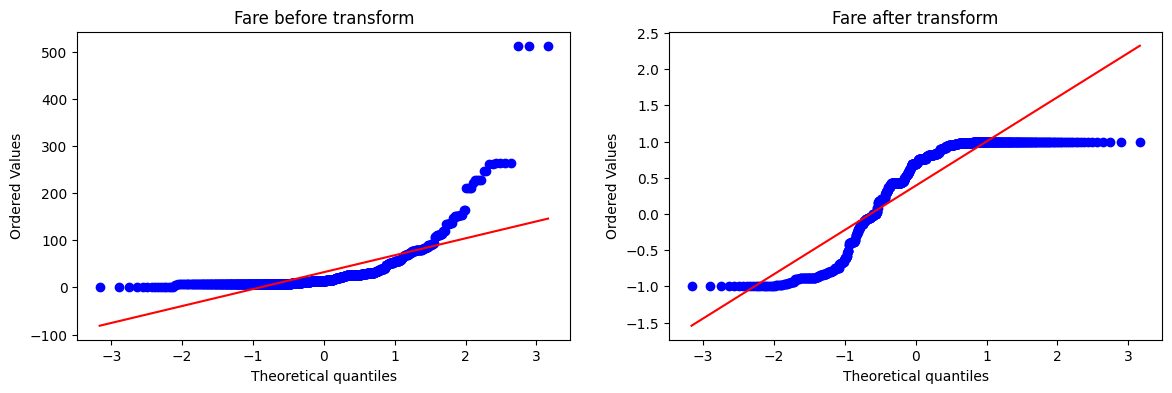

In [52]:
apply_transform(np.sin)